# Machine Learning Main Folder

## Lesson 1: Machine Learning Models & Machine Learning Algorithms

<!--jupyter nbconvert --to webpdf --allow-chromium-download "Machine Learning.ipynb"-->

### Machine Learning Models

- Supervised Learning
- Reinforcement
- Unsupervised Learning

#### 1)Supervised Learning
Supervised learning is a method used to enable machines to classify/predict object, problems or situations based on labeled data fed to the machine.

![Supervised](https://static.javatpoint.com/tutorial/machine-learning/images/supervised-machine-learning.png)
#### 2)Reinforcement Learning
Reinforcement learning is an important type of machine learning where an agent learns how to behave in an enviroment by performing actions and seeing the result.

![Reinforcement](https://www.kdnuggets.com/images/reinforcement-learning-fig1-700.jpg)
#### 3)Unsupervised Learning
Unsupervised machine learning, uses machine learning algorithms to analyze and cluster unlabeled datasets. These algorithms discover hidden patterns or data groupings without the need for human intervention.

![Unsupervised](https://miro.medium.com/max/478/1*Iihw0V-r0raMMtcDTFGGQA.png)

### Machine Learning Algortihms

- Linear Regression
- Decision Trees
- Support Vector Machine

#### 1)Linear Regression
Linear regression is perhaps one of the most well known and well understood algorithms in statistics and machine learning.


##### Linear Regression Formula
<img src="https://mathlake.com/uploads/images/be92d8249a48ea016f1666e0c12598e0.png" align="left" width="500">
<img src="https://static.packt-cdn.com/products/9781789537123/graphics/78c4af48-3b33-4cbd-bc15-45aeb0f8833e.png" align="left" width="200">

In [1]:
%matplotlib inline

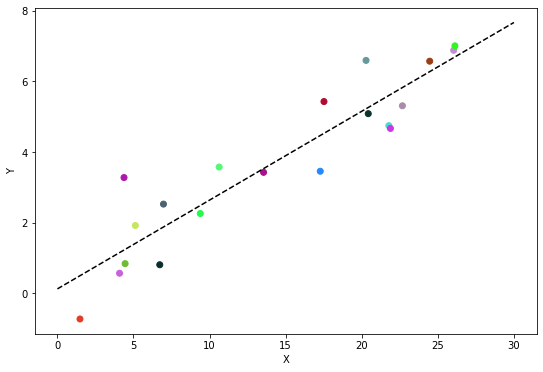

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# generate x from 0 to 30
x = 30 * np.random.random((20, 1))

# y = a*x + b with noise
y = 0.2 * x + 1.0 + np.random.normal(size=x.shape)

# create a linear regression model
model = LinearRegression()
model.fit(x, y)

# predict y from the data
xNew = np.linspace(0, 30, 100)
yNew = model.predict(xNew[:, np.newaxis])

# plot the results
plt.figure(figsize=(9, 6))
ax = plt.axes()
color = np.random.rand(20, 3)
ax.plot(xNew, yNew, color="k", linestyle="--")
ax.scatter(x, y, color=color, marker="o")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()


#### 2)Decision Trees

<img src="https://miro.medium.com/max/640/1*XMId5sJqPtm8-RIwVVz2tg.png" title="Titanic Survival Tree" align="left" width=360>

<img src="https://www.mastersindatascience.org/wp-content/uploads/sites/54/2022/05/tree-graphic.jpg" align="right" width="600">
<p style="text-align:center"><em>Titanic Survival Tree</em> </p>

>Decision tree is drawn upside down with its root at the top. In the image on the up (Titanic Survival Tree), the bold text in black represents a condition/internal node, based on which the tree splits into branches/ edges. The end of the branch that doesn’t split anymore is the decision/leaf, in this case, whether the passenger died or survived, represented as red and green text.



**Information Gain**		
The information gain is based on the decrease in entropy after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).

**Step 1**: Calculate entropy of the target. 

<img src=https://www.saedsayad.com/images/Entropy_3.png>

**Step 2**: The dataset is then split on the different attributes. The entropy for each branch is calculated. Then it is added proportionally, to get total entropy for the split. The resulting entropy is subtracted from the entropy before the split. The result is the Information Gain, or decrease in entropy. 

<img src=https://www.saedsayad.com/images/Entropy_2.png>

<img src=https://www.saedsayad.com/images/Entropy_gain.png>

<img src=https://www.saedsayad.com/images/Entropy_attributes.png>

**Step 3**: Choose attribute with the largest information gain as the decision node, divide the dataset by its branches and repeat the same process on every branch.

<img src=https://www.saedsayad.com/images/Entropy_attribute_best.png>

<img src=https://www.saedsayad.com/images/decision_tree_slices.png>

**Step 4A**: A branch with entropy of 0 is a leaf node.

<img src=https://www.saedsayad.com/images/Entropy_overcast.png>

**Step 4B**: A branc with entropy more than 0 needs further splitting.

<img src=https://www.saedsayad.com/images/Entropy_Sunny.png>

#### 3)Support Vector Machine
The goal is to choose a hyperplane with the greatest possible margin between the decision line and the nearest point within the training set.

<img src=https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png>

>Distance Marign: The distance between the hyperplane and the nearest data point from either set.

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

import pickle

In [6]:
recipes = pd.read_csv("Datasets\\ML Part1_2\\Cupcakes vs Muffins.csv")
print(recipes.head())

     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0


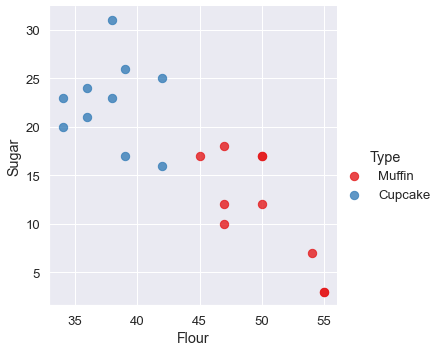

In [8]:
# Plot data
sns.lmplot("Flour","Sugar",data=recipes, hue="Type",
          palette="Set1", fit_reg=False, scatter_kws={"s":70});

In [34]:
# Format our data
typeLabel = np.where(recipes["Type"]=="Muffin",0,1)
recipeFeatures = recipes.columns.values[1:].tolist()
recipeFeatures
ingredients = recipes[["Flour","Sugar"]].values

In [19]:
# Fit model
model = svm.SVC(kernel='linear')
model.fit(ingredients,typeLabel)

SVC(kernel='linear')

In [36]:
# Get the seperating hyperplane
w = model.coef_[0] #y=mx+c
a = -w[0] / w[1] # a = m
xx = np.linspace(30,60) #Numpy array between 30 and 60
yy = a * xx - (model.intercept_[0] / w[1]) # y = x * m - c

# Plot the parallels to the seperating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yyDown = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yyUp= a * xx + (b[1] - a * b[0])

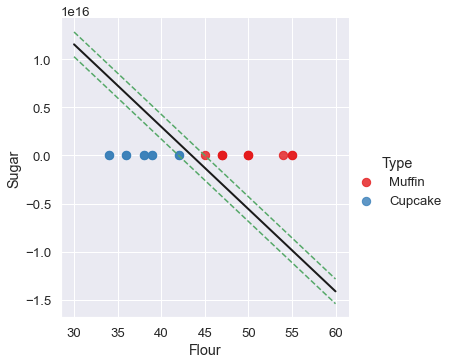

In [35]:
sns.lmplot(x="Flour",y="Sugar",data=recipes, hue="Type",
          palette="Set1", fit_reg=False, scatter_kws={"s":70});
plt.plot(xx, yy,linewidth=2, color="k")
plt.plot(xx, yyDown, color="g", linestyle="--")
plt.plot(xx, yyUp, color="g", linestyle="--")

You are looking at a muffing recipe


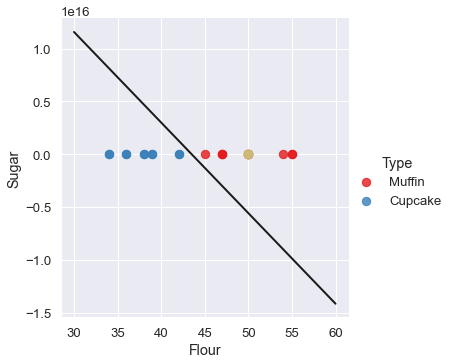

In [62]:
# Create a function to predict muffin or cupcake
def muffinOrCupcake(flour, sugar):
    if model.predict([[flour, sugar]]) == 0:
        print("You are looking at a muffing recipe")
    else:
        print("You are looking at a cupcake recipe")
sns.lmplot(x="Flour",y="Sugar",data=recipes, hue="Type",
          palette="Set1", fit_reg=False, scatter_kws={"s":70});
plt.plot(xx, yy,linewidth=2, color="k")
unknownDessert = (50, 20)
plt.plot(unknownDessert[0], unknownDessert[1], "yo", markersize="9")
muffinOrCupcake(unknownDessert[0], unknownDessert[1])